<h1 style="direction: rtl"> <b> תרגול 9: תהליך מורן ותכנות מבוסס עצמים </b> </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng=np.random.default_rng(18_12_22)

## <div style="direction: rtl"> מודל רייט-פישר </div> ##

### <div style="direction: rtl"> סימולצית תדירות frequency-based simulation </div> ###

<div style="direction: rtl"> יש לנו אוכלוסייה בגודל $N$, ממנה $p$ הם עם אלל A, והשאר עם אלל a. <br> בדור הבא אנחנו מגרילים $N$ פרטים חדשים. כל פרט חדש הוא צאצא מהורה שנבחר רנדומלית מהאוכלוסייה הקודמת, ולכן לכל אחד יש סיכוי $p$ להיות A ו-$1-p$ להיות a.<br> התפלגות האוכלוסייה של אלל A בדור החדש מתפלגת בינומיאלית, כי כמות הפרטים עם אלל A מגיעה מכל שילוב של $k=Np\left(t+1\right)$ מתוך $N$ הפרטים החדשים בסיכוי $p\left(t\right)$ לכל אחד: 
</div>

$$ N p\left(t+1\right)\sim \text{Binom}\Big(p=p\left(t\right),\; N\Big)$$

#### ####
<div style="direction: rtl"> בפירוט: </div>

$$ P_\text{ Binom}\left(k\right) = \binom{N}{k}\;p^{k}\left(1-p\right)^{N-k}$$

$$ Np\left(t+1\right) \sim \binom{N}{N p\left(t+1\right)}\;p\left(t\right)^{N p\left(t+1\right)}\left(1-p\left(t\right)\right)^{N\left(1 -  p\left(t+1\right)\right)}$$

#### ####

<div style="direction: rtl"> במקרה שיש fitness, נשנה את הסיכוי להורה לפי יחס התאמה\כושר השרידות.</div>

| type | proportion | fitness weighted proportion | survival probability |
| :-: | :-: | :------: | :-----: |
| A | $p$ | $W_A p$ | $\frac{W_A p}{W_A p + W_a \left(1-p\right)}$ |
| a | $1-p$ | $W_a \left(1-p\right)$ | $\frac{W_a \left(1-p\right)}{W_A p + W_a \left(1-p\right)}$ |
|Sum| $1$ | $W_A p+W_a \left(1-p\right)$ | $1$ |

<br>
$~$

$$ N p\left(t+1\right)\sim \text{Binom}\left(p=\frac{W_A p\left(t\right)}{W_A p\left(t\right)+W_a \left(1-p\left(t\right)\right)}, N\right)$$


<div style="direction: rtl"> הגנרטור הפסואדו-אקראי בא עם פונקציה להגרלת מספר אקראי מהתפלגות בינומיאלית <code>binomial</code> עם $N$ ו-$p$. 
</div>

In [2]:
# rng.binomial(20,0.2)
# rng.binomial(20,[0.2,0.6])
# rng.binomial([20,50],[0.2,0.6])  # like [rng.binomial(20,0.2), rng.binomial(50,0.6)]

In [3]:
rng=np.random.default_rng(18_12_22)

<div style="direction: rtl"> נייצר צבר של 1,000 סימולציות:<br> נריץ בלולאת for לפי אורך הריצה המירבי שאנחנו מוכנים לחכות. כשכל הסימולציות גמרו, כשבכולן או ש-A התקבע או ש-a התקבע, נצא מהלולאה עם <code style="color: green">break</code> ונחתוך את הזמן העודף.  
</div>

In [4]:
N_sims = 1_000
N=24
p=0.5

MAX_ITERATIONS=2_000
fracs = np.zeros((MAX_ITERATIONS+1,N_sims))
fracs[0,:]=p

for t in range(MAX_ITERATIONS):
    new_num_As = rng.binomial(N, fracs[t,:])
    fracs[t+1,:] = new_num_As/N
    if np.isin(fracs[t+1,:],[1,0]).all(): # all finished
        break
        # isin(array,[1,0]) -> True for each element in array which is either 1 or 0
        # array = [0, 0.5, 1, 1.5] -> [True, False, True, False]
        # we want all simulations to be either p=1 (fixed A) or p=0 (fixed a)


# We last updated t+1, so t+2 and above is not used.
fracs = fracs[:t+2,:]

In [5]:
# np.isin([fracs[-1,:]],[0,1])

<div style="direction: rtl"> נסתכל על כל הריצות: רואים שהסימולציות מגיעות לקיבוע ב-0 או 1 ביחס די שווה, אבל הן מגיעות לקיבוע בזמנים מאוד שונים: חלק מהר מאוד, חלק לאט מאוד, והרוב מתישהו באמצע. 
</div>

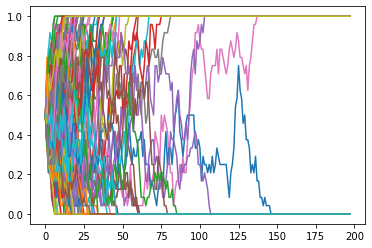

In [6]:
plt.plot(fracs[:,:100])
plt.show()

<div style="direction: rtl"> נייצר היסטוגרמות לסטטיסטיקות: מה ההתפלגות לקיבוע ל-A וכמה זמן לוקח הקיבוע
</div>

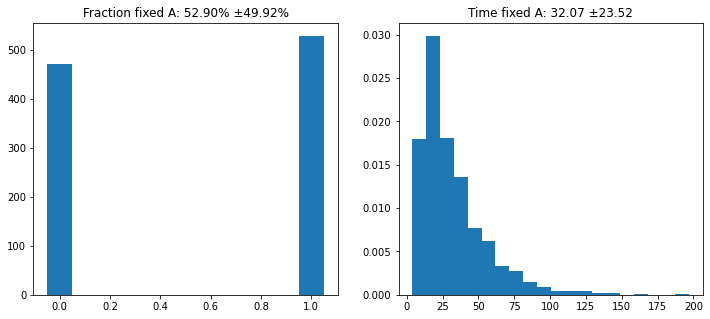

In [7]:
fix_frac = fracs[-1,:]
fix_time = (~np.isin(fracs,[0,1])).sum(axis=0)

fix_frac_label = f"Fraction fixed A: {np.mean(fix_frac):.2%} ±{np.std(fix_frac):.2%}"
fix_time_label = f"Time fixed A: {np.mean(fix_time):.4} ±{np.std(fix_time):.4}"

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].hist(fix_frac, bins=[-0.05,.05, 0.95,1.05])
axes[0].set_title(fix_frac_label)
axes[1].hist(fix_time,bins=20, density=True)
axes[1].set_title(fix_time_label)

wright_fisher = (fix_frac, fix_time) # save variables
plt.show()

<div style="direction: rtl"> הקוד הבא מראה את התפלגות שבר ה-A בכמה זמנים: 
</div>

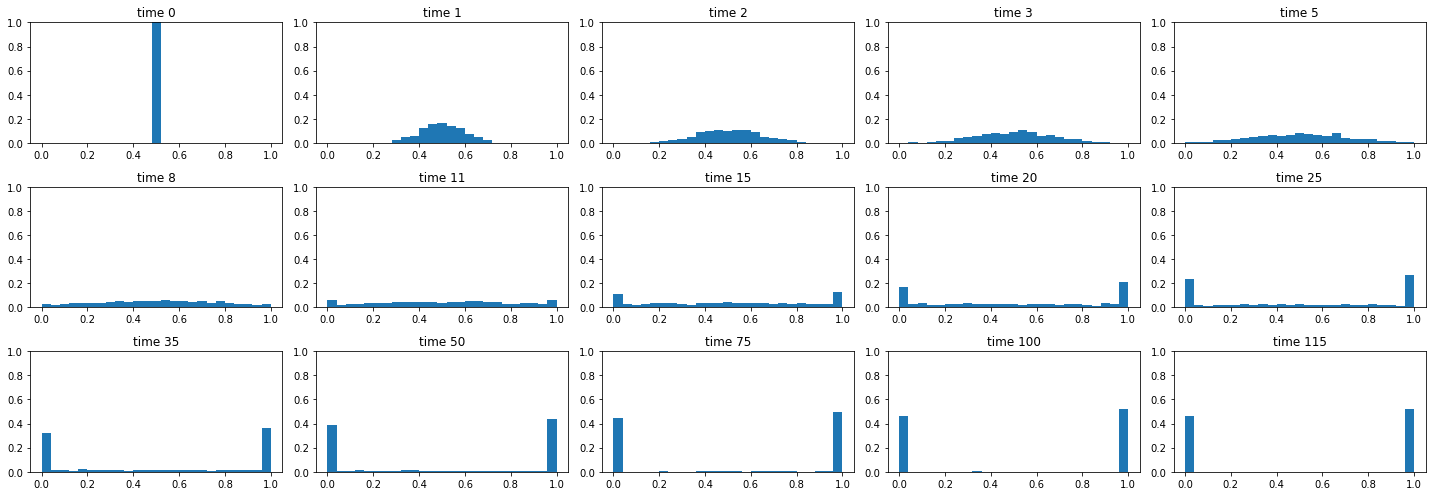

In [8]:
fig, axes = plt.subplots(3,5,figsize=(20,7))
times = [0,  1,  2,  3, 5, 
         8, 11, 15, 20, 25,
         35, 50, 75, 100, 115,]
for t,axe in zip(times,axes.flat):
    dist = []
    n=0
    for i in range(N_sims):
        if fix_time[i]<=t:
            dist.append(fracs[-1,i])
        else:
            dist.append(fracs[t,i])
        n+=1
    axe.hist(dist,bins=N+1,weights=np.ones(n)/n,range=(0,1))
    axe.set_title(f'time {t}')
    axe.set_ylim(0,1)
plt.tight_layout()
plt.show()

<div style="direction: rtl"> אפשר לראות מה קורה אם מגדילים את גודל האוכלוסייה:
</div>

In [9]:
def run_WF_sim(N=24,p=0.5,n_sims=200):
    MAX_ITERATIONS=2_000
    fracs = np.zeros((MAX_ITERATIONS+1,N_sims))
    fracs[0,:]=p

    for t in range(MAX_ITERATIONS):
        new_num_As = rng.binomial(N, fracs[t,:])
        fracs[t+1,:] = new_num_As/N
        if np.isin(fracs[t+1,:],[1,0]).all(): # all finished
            break
            # isin(array,[1,0]) -> True for each element in array which is either 1 or 0
            # array = [0, 0.5, 1, 1.5] -> [True, False, True, False]
            # we want all simulations to be either p=1 (fixed A) or p=0 (fixed a)


    # We last updated t+1, so t+2 and above is not used.
    fracs = fracs[:t+2,:]
    return fracs

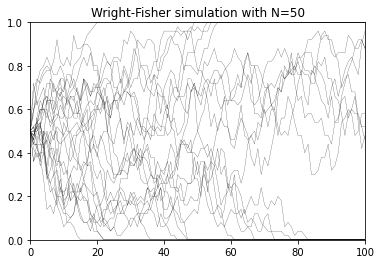

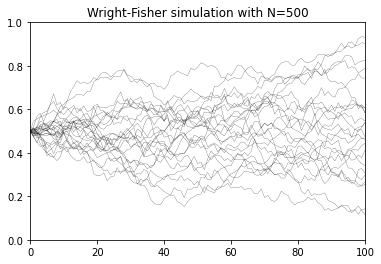

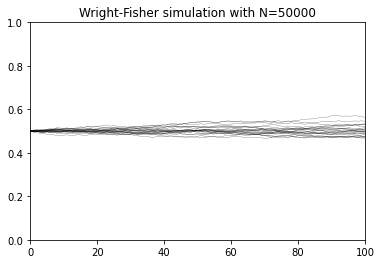

In [10]:
for N in [50,500,50000]:
    plt.plot(run_WF_sim(N)[:,:24],'k',linewidth=0.2)
    plt.title(f'Wright-Fisher simulation with N={N}')
    plt.ylim(0,1)
    plt.xlim(0,100)
    plt.show()

---

## <div style="direction: rtl"> מודל מורן </div> ##

<div style="direction: rtl"> במודל מורן,יש לנו אוכלוסייה קבועה עם תדירות אללים A של p. <br> בכל פרק זמן, פרט אקראי אחד מת, ופרט אקראי מתרבה. נממש את המודל עם סימולציית סוכנים
</div>

## <div style="direction: rtl"> תכנות מונחה עצמים </div> ##

<div style="direction: rtl">  פייתון היא שפת תכנות מבוססת עצמים (אובייקטים). (כמעט) כל דבר בפייתון הוא בעצם אובייקט 
</div>

In [11]:
slice_object=slice(9,13)
string_object="string"

<div style="direction: rtl"> לאובייקטים יש תכונות שניגשים אליהן באמצעות הנקודה <code>object.stuff</code> שהן קובעות איך האוביקט מתנהג: או מידע שמוכל באובייקט או פונקציות שעובדות עם האובייקט.
</div>

In [12]:
slice_object.start # מידע שנמצא באובייקט

9

In [13]:
string_object.capitalize() # מה שאפשר לעשות עם האובייקט

'String'

<div style="direction: rtl"> גם מספר מיוצג על ידי אובייקט.
</div>

In [14]:
number_object=57

<div style="direction: rtl"> זה לא רק רצף ביטים: אנחנו יכולים להראות הרבה תכונות של האובייקט עם נעשה <code>.</code> ו-autocomplete עם <kbd>Tab</kbd> </div>

In [15]:
# number_object.

<div style="direction: rtl"> לרוב האובייקטים יש תכונות "נסתרות", שמסומנות ע"י קווים תחתונים _ (double-underscore/dunder). <br> אפשר לחשוב על זה בתור ה"תשתית" או ה"צנרת" של פייתון, הם מורים לפייתון איך לעבוד עם האובייקט. <br> זה הרבה יותר מדי מסובך בשביל להבין באופן מלא, אבל צריך לדעת שזה קיים, ומספר מצומצם של המקרים חשובים והנפוצים שזה רלוונטי
</div>

In [16]:
# number_object._
# number_object.__add__(4)

<div style="direction: rtl"> למשל: מערך numpy הוא אובייקט: אפשר לחבר אותו כי יש לו פונקציה של __add__
</div>

In [17]:
arr = np.ones(2)
arr + number_object
# arr.__add__(number_object)
# number_object.__add__(arr)

array([58., 58.])

<div style="direction: rtl"> אנחנו רוצים לעשות סימולצית סוכנים: ניצור אובייקט משלנו שייצג פרט האפלואידי. </div>

#### code to create object ####

In [18]:
class HaploidAgent:
    """Ignore me for now"""
    pass
def create_empty_agent_object():
    return HaploidAgent()
def is_key_value_relevant(key,value):
    relevant=True
    try:
        if len(value)>50:
            relevant=False
    except TypeError:
        pass
    finally:
        return relevant and key[0]!='_' and key not in {'In','Out','exit','quit'}
def show_globals():
    di={k: v for k, v in globals().items() if is_key_value_relevant(k,v) }
    return di

#### ####

In [19]:
haploid_agent = create_empty_agent_object()

<div style="direction: rtl"> כל אובייקט מקבל id כשהוא נוצר: </div>

In [20]:
haploid_agent
# hex(id(haploid_agent))

<div style="direction: rtl"> לאובייקטים שונים יש id שונה, גם אם הם מכילים אותו מידע </div>

In [21]:
a,b=[],[]
hex(id(a)), hex(id(b))

('0x7f2f8b3abc00', '0x7f2f8b33d800')

In [22]:
a.append(1)
a,b

([1], [])

<div style="direction: rtl"> מצד שני, שני משתנים יכולים להיות שייכים לאותו אובייקט: </div>

In [23]:
c=a
hex(id(a))

'0x7f2f8b3abc00'

In [24]:
c.append(2)
a,b,c

([1, 2], [], [1, 2])

<div style="direction: rtl"> האובייקט החדש שהכנו חסר תכונות: נעשה <kbd>Tab</kbd><kbd>.</kbd> ולא נקבל שום autocomplete </div>

In [25]:
# haploid_agent.

<div style="direction: rtl"> ניתן לפרט כמה תכונות: ניתן לו גנטיקה, וניתן לו גיל.</div>

In [26]:
haploid_agent.gen="A"

In [27]:
haploid_agent.age=5

<div style="direction: rtl"> עכשי אם נעשה נעשה <kbd>Tab</kbd><kbd>.</kbd> נראה שיש לו שתי תכונות. </div>

In [28]:
# haploid_agent.

<div style="direction: rtl">נסמלץ מיטוזה ע"י ידי זה שנייצר שני פרטים חדשים: נוסיף את הפונקציה לאובייקט </div>

In [29]:
def mitosis_ad_hoc():
    return create_empty_agent_object(),create_empty_agent_object()
haploid_agent.mitosis=mitosis_ad_hoc

In [30]:
haploid_agent.mitosis()

(<__main__.HaploidAgent at 0x7f2f8b75a250>,
 <__main__.HaploidAgent at 0x7f2f8b75a850>)

<div style="direction: rtl"> זה מאוד דומה למילון (dictionary) </div>

In [31]:
dictionary_agent={'age':5,'gen':"A","mitosis": mitosis_ad_hoc}

In [32]:
# dictionary_agent['age']
# dictionary_agent['gen']
# dictionary_agent['mitosis']()

<div style="direction: rtl"> זה בסדר בשביל ליצור פרט יחיד, אבל אנחנו רוצים ליצור הרבה פרטים: למשל, יצרנו במיטוזה שני אובייקטים חדשים, אבל הם ריקים: </div>

<div style="direction: rtl"> בשביל ליצור אובייקטים באופן מסודר, נשתמש במחלקה (class) </div>

In [33]:
# נהוג לכתוב שמות של מחלקות עם CapitalizedCamelCase
class HaploidAgent:
    "A haploid agent"
    ...
haploid_agent=HaploidAgent()

<div style="direction: rtl"> המחלקה היא הסוג של האובייקט. </div>

In [34]:
# type(haploid_agent)
# type(fracs)

<div style="direction: rtl"> במקום לתת לכל אובייקט את התכונות באופן מפוזר כמו שעשינו קודם, נרכז את זה במחלקה באמצעות פונקציית dunder שנקראת <code>__init__</code>:<br>הפונקציה הזאת מופעלת מיד אחרי שמייצרים את האובייקט. <br> למשל, ניצור פרט הפלואידי שיש לו גנטיקה וגיל
</div>

In [35]:
class HaploidAgent:
    """A haploid creature with genetics (string e.g. 'A') and an age"""

    def __init__(self, genetics):
        self.gen=genetics
        self.age=0


<div style="direction: rtl"> קריאה למחלקה <code>Haploide_Agent</code> מייצרת אובייקט עם שני שדות: גנטיקה וגיל, כשהגיל מאותחל לאפס.
</div>

In [36]:
haploid_agent = HaploidAgent('A')
haploid_agent, haploid_agent.gen, haploid_agent.age

(<__main__.HaploidAgent at 0x7f2f8b766580>, 'A', 0)

<div style="direction: rtl"> פונקציה בתוך מחלקה היא שיטה (method), והיא תמיד מקבלת את האובייקט עצמו בתור הארגומנט הראשון self, ובקריאה <code>obj.method(x,y...)</code> באים כל השאר </div>

```python
class Stuff:
    def func(self,x,y):
        ...

...
my_stuff=Stuff()
my_stuff.func(x=3,y=4) # runs func(my_stuff,3,4)
```

<div style="direction: rtl"> כל דבר שמגדירים במחלקה משותף לכל האובייקטים, לכן כדאי מאוד מאוד שכל מה שיכול להשתנות בתוך אובייקט (כמו מידע) תמיד יסופק ב-__init__, אחרת יש כאב ראש רציני. </div>

<div style="direction: rtl"> נוסיף עוד כמה תכונות למחלקה: חוץ ממאתחל __init__, נוסיף שיטה של __repr__ שתיתן לנו הצגה יותר נחמדה, ושיטה שתייצג את מיטוזה: <br> נייצג את זה שהתא מתחלק לשני תאי-בת על ידי זה שניצור שני אובייקטים חדשים עם אותה גנטיקה בגיל 0.</div>

In [37]:
class HaploidAgent:
    """A haploid creature with genetics (string e.g. 'A') and an age"""

    def __init__(self,genetics: str, age=0):
        self.gen=genetics
        self.age=age

    def mitosis(self):
        """Return two daugther HaploidAgents"""
        return HaploidAgent(self.gen), HaploidAgent(self.gen)

    def __repr__(self):
        """Show initialization HaploidAgent(genetics, age)."""
        gen_label=f'{repr(self.gen)}'
        age_label=f', age={repr(self.age)}' if self.age>0 else ''
        return f'HaploidAgent({gen_label}{age_label})'

<div style="direction: rtl"> __repr__ נקרא כשפייתון צריך להציג את האובייקט בתור טקסט, למשל כשמדפיסים הודעת שגיאה. הצגת __repr__ טובה בדרך כלל נותנת את הקוד לייצר מחדש את האובייקט
</div>

In [38]:
A = HaploidAgent('A')
print(A)
A.age+=1
A

HaploidAgent('A')


HaploidAgent('A', age=1)

<div style="direction: rtl"><br>עכשיו שיש לנו מחלקה שמייצגת את התאים, נייצר רשימה שלהם ש-$p$ מהם עם גנטיקה של אלל A והשאר עם גנטיקה של אלל a, ונייצר מזה את האובייקטים שמייצגים את התאים ממש. 
</div>


In [39]:
N=24
p=1/2

num_A = int(p*N)
num_a = N-num_A
allels = ['A']*(num_A)+['a']*(num_a)
print(allels)
population=[HaploidAgent(allel) for allel in allels]
print(population)

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
[HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a')]


<div style="direction: rtl"><br>יצרנו אוכלוסייה של תאים: כל צעד נבחר אחר שיתרבה $i$ ואחד שימות $j$: נשתמש בשיטה <code>()mitosis.</code> לאחד המתרבה ונחליף את האובייקטים הישנים ב-$i,j$ עם תאי הבת: האובייקטים החדשים שהשיטה יצרה. 
</div>


In [40]:
# time step
i, j = rng.integers(N,size=2)
population[i], population[j] = population[i].mitosis()
#
print(i,j)
print(population)

15 0
[HaploidAgent('a'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('A'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a'), HaploidAgent('a')]


<div style="direction: rtl"><br>נשתמש ב-<code>plt.scatter</code> כדי לצייר את התאים: הפונקציה מציירת נקודות בגדלים וצבעים שונים. 
</div>


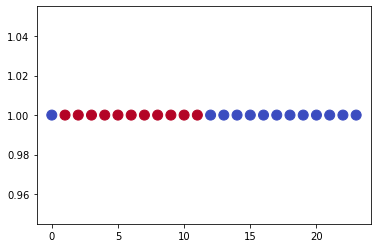

In [41]:
xs = np.arange(N) # put the cells in a line
ys = np.ones(N)   # of the same height
sizes = 100       # the same size
colors = ['A' in cell.gen for cell in population]
# colors array is 0 for A and 1 for a: this is mapped to blue and red
cmap_rb='coolwarm'

plt.scatter(xs,ys,s=sizes,c=colors,cmap=cmap_rb)
plt.show()

<div style="direction: rtl"> אם היינו רוצים להוסיף התאמה\כושר שרידות fitness, אפשר להשתמש ב-rejection sampling: 
    
</div>


```python
def fitness(cell):
    if 'A' in cell.gen:
        return 1
    else:
        return 0.5

max_fitness=1 # צריך להיות גדול מכל התאמה אפשרית
# למשל W המקסימלי


# rejection sampling
def rejection_sample_pop(population)
    """Take a population of HaploidAgent and sample according to fitness"""
    MAX_ATTEMPTS = 10
    for attempts in range(MAX_ATTEMPTS):
        i = rng.integers(N) # נבחר תא רנדומלי
        if rng.random() < fitness(population[i])/max_fitness:
            return i # accept i
        else:
            pass # reject i

    # too many attempts: give last, or default, or None, or throw error
    return rng.integers(N)

```

<div style="direction: rtl"> ואז היינו לוקחים את התא המתרבה מתוך rejection_sample_pop במקום סתם rng.randint. (את התא המת אפשר לקחת עם integers) 
    
</div>


<div style="direction: rtl">  במקרה שלנו אין fitness, נכניס את הצעד ואת הציור לפונקציות </div>

In [42]:
def moran_step(population):
    for cell in population:
        cell.age+=1
    i, j = rng.integers(N,size=2)
    population[i], population[j] = population[i].mitosis()
    return i,j

rb = plt.cm.coolwarm((0,512)) # [c0, c1] the first and last colors of 'coolwarm'
def plot_pop(pop,t=0):
    plt.scatter(np.arange(len(pop)),
                np.ones(len(pop))*t,
                s=100,
                c=rb[[('A' in cell.gen)+0 for cell in pop]], # rb[ [0,1,1,0,1...] ] = [blue,red,red,blue,...]
                )

def plot_change(t,i,j):
    # also picture which cells died and breeded last timestep
    plt.plot(i,t-1,color='lime',marker='o',markersize=15,markerfacecolor='none')
    plt.plot(j,t-1,c='k',marker='x',markersize=15)
    plt.plot(j,t,color='k',marker='o',markersize=15,markerfacecolor='none')
    plt.annotate('',(j-0.05,t-0.05),xytext=(i+0.05,t-0.95),color='k',size=10,arrowprops=dict(arrowstyle="simple",color='k',connectionstyle="arc3"))


<div style="direction: rtl"> נשמור את כל האוכלוסיות בעבר</div>

In [43]:
# save copy in history
population=[HaploidAgent(allel) for allel in allels]
hist_populations=[ [HaploidAgent(cell.gen,cell.age) for cell in population] ]

<div style="direction: rtl"> נעשה צעד ונצייר את הסימולציה עד עכשיו</div>

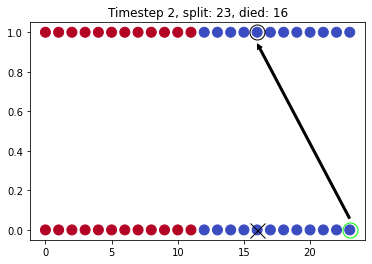

In [44]:
#ctrl shift to step

# do one timestep and save copy in history
i,j = moran_step(population)
hist_populations.append([HaploidAgent(cell.gen,cell.age) for cell in population])

# plot all previous populations
for t in range(len(hist_populations)):
    plot_pop(hist_populations[t],t)


# plot change
plot_change(t,i,j)
plt.title(f"Timestep {len(hist_populations)}, split: {i}, died: {j}")
plt.show()

<div style="direction: rtl">נעשה סימולציה רצינית יותר: נריץ בלולאה עד שנגיע למצב יציב (כולם A או כולם a ) ונחשב סטטיסטיקות באמצע. 
</div>


In [45]:
rng=np.random.default_rng(18_12_22)

In [46]:
N_sims = 1_000

N=24
p=1/2

num_A = int(p*N)
num_a = N-num_A
allels = ['A']*(num_A)+['a']*(num_a)
population=[[HaploidAgent(allel) for allel in allels] for i in range(N_sims)]

ages_sum=0
frac = num_A/N
fracs = [[frac] for i in range(N_sims)]
ages = [[ages_sum/N] for i in range(N_sims)]

done = [False for i in range(N_sims)]

MAX_ITERATIONS=20_000
for t in range(MAX_ITERATIONS):
    for i in range(N_sims):
        if done[i]: # נדלג על סימוציות שנגמרו
            continue
        else:
            moran_step(population[i])
            ages_sum = sum(cell.age for cell in population[i])
            ages[i].append(ages_sum/len(population[i]))
            num_A = sum(cell.gen.count('A') for cell in population[i])
            frac = num_A/len(population[i])
            fracs[i].append(frac)

            if frac in (0, 1):
                # all A or all a
                done[i]=True

    # if all simulations are done
    if all(done):
        break

<div style="direction: rtl"> נצייר את שבר ה-A לכל סימולציה ואת הגיל הממוצע לפרט</div>

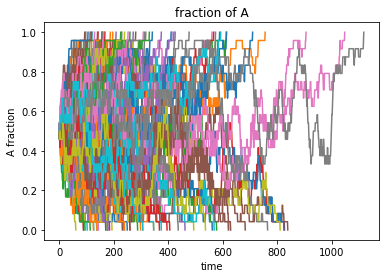

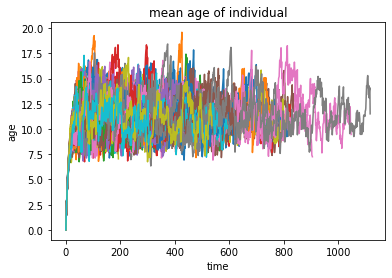

In [47]:
for frac in fracs[:100]:
    plt.plot(frac)
plt.title('fraction of A')
plt.xlabel('time')
plt.ylabel('A fraction')
plt.show()
for age in ages[:100]:
    plt.plot(age)
plt.title('mean age of individual')
plt.xlabel('time')
plt.ylabel('age')
plt.show()

<div style="direction: rtl"> נחזור על הסטטיסטיקות שעשינו קודם, ונוסיף את הגיל של הפרטים </div>

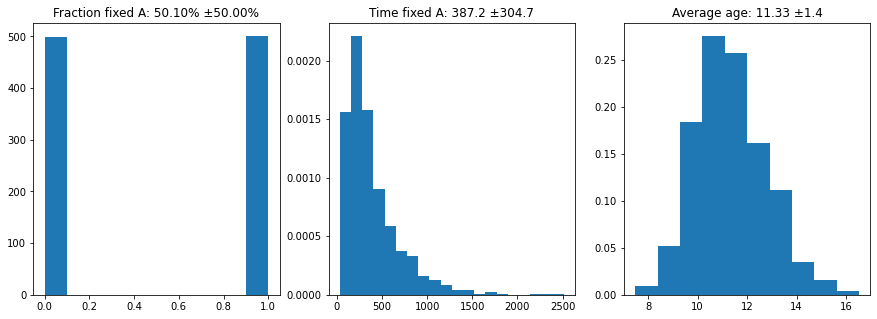

In [48]:
fix_frac = np.array([frac[-1] for frac in fracs])
fix_time = np.array([len(frac) for frac in fracs])
last_ages = np.array([np.mean(age[-10:]) for age in ages])

fix_frac_label = f"Fraction fixed A: {np.mean(fix_frac):.2%} ±{np.std(fix_frac):.2%}"
fix_time_label = f"Time fixed A: {np.mean(fix_time):.4} ±{np.std(fix_time):.4}"
age_label = f"Average age: {np.mean(last_ages):.2f} ±{np.std(last_ages):.2}"

fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].hist(fix_frac)
axes[0].set_title(fix_frac_label)
axes[1].hist(fix_time,bins=20, density=True)
axes[1].set_title(fix_time_label)
axes[2].hist(last_ages, density=True)
axes[2].set_title(age_label)
plt.show()

<div style="direction: rtl"> A התקבע בתדירות של חצי, והזמן לקיבוע יחסית רחב: הזמן בסימולציה לא תואם למודל רייט פישר, אז לא בטוח שנכון להשוות את התוצאות.<br> הגיל הממוצע של פרט משתנה הרבה פחות, ומתייצב סביב 12 פלוס מינוס דור. זה כנראה בגלל שכל שלב 2 תאים מאבדים את הגיל שלהם ממיטוזה ומוות,ובאוכלוסייה של 24 פרטים, כך שבממוצע חולפים 12 שלבים לפני שתא מוחלף.
</div>


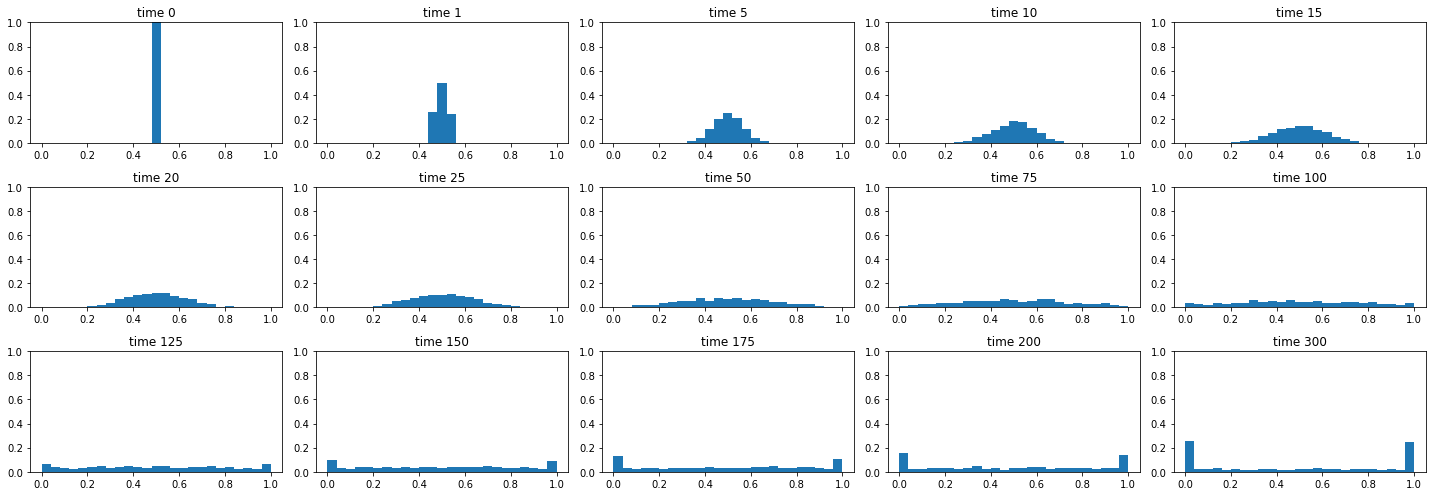

In [49]:
fig, axes = plt.subplots(3,5,figsize=(20,7))
times = [0,  1,  5,  10, 15, 
         20, 25, 50, 75, 100,
        125, 150, 175, 200, 300]
for t,axe in zip(times,axes.flat):
    dist = []
    n=0
    for i in range(N_sims):
        if fix_time[i]<=t:
            dist.append(fracs[i][-1])
        else:
            dist.append(fracs[i][t])
        n+=1
    axe.hist(dist,bins=N+1,weights=np.ones(n)/n,range=(0,1))
    axe.set_title(f'time {t}')
    axe.set_ylim(0,1)
plt.tight_layout()
plt.show()